<h1 style="font-family:Times New Roman;">Kaggle Competition</h1>

<p style="font-family:Times New Roman;"><b><font size = "4">Suhas Alur</font></b></p>

<h1 style="font-family:Times New Roman;">Loading & Pre-processing</h1>

In [1]:
# import necessary libraries and specify that graphs should be plotted inline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%cd 'C:\Users\Suhas\Documents\MSBA\Semester Two\Predictive Analytics\Homework\Homework - 5\Data'

C:\Users\Suhas\Documents\MSBA\Semester Two\Predictive Analytics\Homework\Homework - 5\Data


<h4 style="font-family:Times New Roman;">Loading the training dataset</h4>

In [2]:
# Import the train dataset
data_train = pd.read_csv('train.csv')

In [3]:
# Splitting the dataset based on attributes and target variable
X = data_train.iloc[:,0:25]
y = data_train.adopter

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
print len(y)
print sum(y)

86682
1540


In [6]:
# Splitting the train data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
print len(y_train)
print sum(y_train)

60677
1101


In [8]:
print len(y_test)
print sum(y_test)

26005
439


In [9]:
# Using SMOTE to oversample the minority class
#from imblearn.combine import SMOTEENN

#smote = SMOTEENN(random_state = 42)

#smote = SMOTE(kind='regular', n_jobs = -1, m_neighbors = 20, k_neighbors = 10)
#smox, smoy = smote.fit_sample(X_train, y_train)

In [10]:
#smox, smoy = smote.fit_sample(X_train, y_train)

In [11]:
#print len(smoy)
#print sum(smoy)

<h4 style="font-family:Times New Roman;">Fitting the model using the train dataset</h4>

In [12]:
# instantiating a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 9, C = 0.001 , n_jobs = -1, penalty = 'l1', class_weight = 'balanced', intercept_scaling  = 5)

In [13]:
# Normalizing the data before fitting the data
#from sklearn import preprocessing

#min_max_scaler = preprocessing.MinMaxScaler()
#smox = min_max_scaler.fit_transform(smox)

<h4 style="font-family:Times New Roman;">Cross-validating the model</h4>

In [14]:
# Using cross validation to understand if the model has overfit
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=3)

# Accuracy of the cross-validation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.01)


In [15]:
# Fitting the model on 70% dataset
model = model.fit(X_train, y_train)
#predicted = model.predict(smox)
# AUC
#from sklearn.metrics import roc_auc_score
#print roc_auc_score(smoy, predicted)

In [16]:
print len(y_test)
print sum(y_test)

26005
439


In [17]:
# Using the test data to check prediction accuracy
predicted = model.predict(X_test)

In [19]:
submission = pd.DataFrame({'prediction_gbc':predicted})
submission.to_csv("prediction_logistic.csv", index=False)

In [18]:
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predicted, target_names=target_names))
print confusion_matrix(y_test, predicted)

             precision    recall  f1-score   support

    class 0       0.99      0.79      0.88     25566
    class 1       0.04      0.53      0.08       439

avg / total       0.97      0.78      0.86     26005

[[20078  5488]
 [  207   232]]


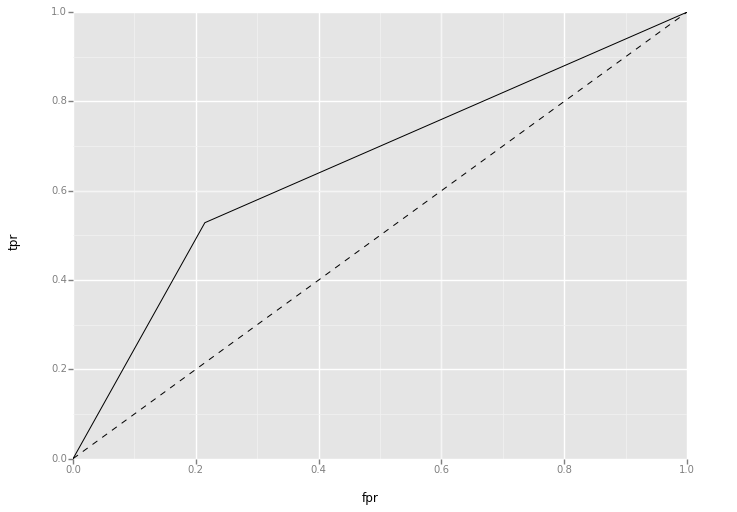

<ggplot: (15406403)>

In [20]:
from sklearn import metrics
import pandas as pd
from ggplot import *

fpr, tpr, _ = metrics.roc_curve(y_test, predicted)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [21]:
# Using the test data to check prediction accuracy
predicted = model.predict_proba(X_test)

In [22]:
from sklearn.metrics import classification_report, f1_score

def drange(start, stop, step):
    while start < stop:
            yield start
            start += step


for j in drange(0.00, 1.00, 0.01):
    cutoff = j
    y_pred = list()
    for i in range(0,len(predicted[:,1])):
        if predicted[:,1][i] > cutoff:
            y_pred.append(1)
        else:
            y_pred.append(0)
    target_names = ['class 0', 'class 1']
    print "Cutoff = {}".format(cutoff)
    print(classification_report(y_test, y_pred, target_names=target_names))
    print confusion_matrix(y_test, y_pred)
    print("*********************************************************")

Cutoff = 0.0
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00     25566
    class 1       0.02      1.00      0.03       439

avg / total       0.00      0.02      0.00     26005

[[    0 25566]
 [    0   439]]
*********************************************************
Cutoff = 0.01
             precision    recall  f1-score   support

    class 0       1.00      0.00      0.00     25566
    class 1       0.02      1.00      0.03       439

avg / total       0.98      0.02      0.00     26005

[[    4 25562]
 [    0   439]]
*********************************************************
Cutoff = 0.02
             precision    recall  f1-score   support

    class 0       1.00      0.00      0.00     25566
    class 1       0.02      1.00      0.03       439

avg / total       0.98      0.02      0.00     26005

[[    4 25562]
 [    0   439]]
*********************************************************
Cutoff = 0.03
             precision    recall 

<h4 style="font-family:Times New Roman;">Loading the test dataset</h4>

In [23]:
# Import the train dataset
data_test = pd.read_csv('test.csv')

In [24]:
# Taking only the required attributes
X_test = data_test.iloc[:,0:25]
X_test = np.array(X_test)

In [25]:
# Normalizing the data before fitting the data
#from sklearn import preprocessing

#min_max_scaler = preprocessing.MinMaxScaler()
#X_test = min_max_scaler.fit_transform(X_test)

<h4 style="font-family:Times New Roman;">Predicting</h4>

In [26]:
# Making predictions
predicted = model.predict_proba(X_test)

In [27]:
cutoff = 0.69
y_pred = list()
for i in range(0,len(predicted[:,1])):
    if predicted[:,1][i] > cutoff:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
print len(y_pred)
print sum(y_pred)

86681
5748


In [30]:
submission = pd.DataFrame({'user_id': data_test['user_id'], 'prediction(adopter)':y_pred})
submission = submission[['user_id', 'prediction(adopter)']]
submission.to_csv("logistic_regression_new_20Nov.csv", index=False)